In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
import quandl
from datetime import datetime

In [2]:
data = 'GOOG'
try:
    # Reading data from pandas datareader
    df = pdr.get_data_yahoo(data, start = datetime(2004, 8, 19), end = datetime.today())

    # Writing the data into a CSV, in case API read fails
    df.to_csv('Datasets/' + data + '.csv')
except:
    df = pd.read_csv('Datasets/' + data + '.csv', index_col = 'Date', parse_dates = True)

In [3]:
# Earliest 5 rows
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-11,1153.069946,1139.579956,1143.250000,1144.209961,1195500.0,1144.209961
2019-07-12,1147.339966,1138.780029,1143.989990,1144.900024,864000.0,1144.900024
2019-07-15,1150.819946,1139.400024,1146.859985,1150.339966,903800.0,1150.339966
2019-07-16,1158.579956,1145.000000,1146.000000,1153.579956,1233900.0,1153.579956
2019-07-17,1158.359985,1148.000000,1150.969971,1148.935059,436306.0,1148.935059


In [4]:
# Latest 5 rows
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3753.000000,3753.000000,3753.000000,3753.000000,3.753000e+03,3753.000000
mean,470.511833,461.820302,466.318874,466.262490,7.266759e+06,466.262490
std,318.346113,313.368000,315.865904,316.013082,8.138413e+06,316.013082
min,50.680038,47.800831,49.409801,49.818268,7.900000e+03,49.818268
25%,237.335403,232.319214,235.098785,234.859695,1.888500e+06,234.859695
50%,313.076508,308.085236,310.585846,310.829926,4.585400e+06,310.829926
75%,674.900024,659.580017,667.849976,668.260010,9.457800e+06,668.260010
max,1289.270020,1266.295044,1274.000000,1287.579956,8.254150e+07,1287.579956


In [6]:
# Sampling the data month-wise
mw = df.resample('M').mean().reset_index()
mw['Date'] = mw['Date'].apply(lambda date: f'{date.year}-{date.month}')
mw.set_index('Date', inplace = True)
mw.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-8,53.797798,51.334253,52.502651,52.434573,1.491568e+07,52.434573
2004-9,57.245667,55.271401,55.779497,56.402162,1.016682e+07,56.402162
2004-10,77.978432,74.410615,75.960519,76.329374,2.457433e+07,76.329374
2004-11,90.639783,86.757195,88.750200,88.416214,2.653653e+07,88.416214
2004-12,91.655997,89.427305,90.359719,90.545612,1.326237e+07,90.545612


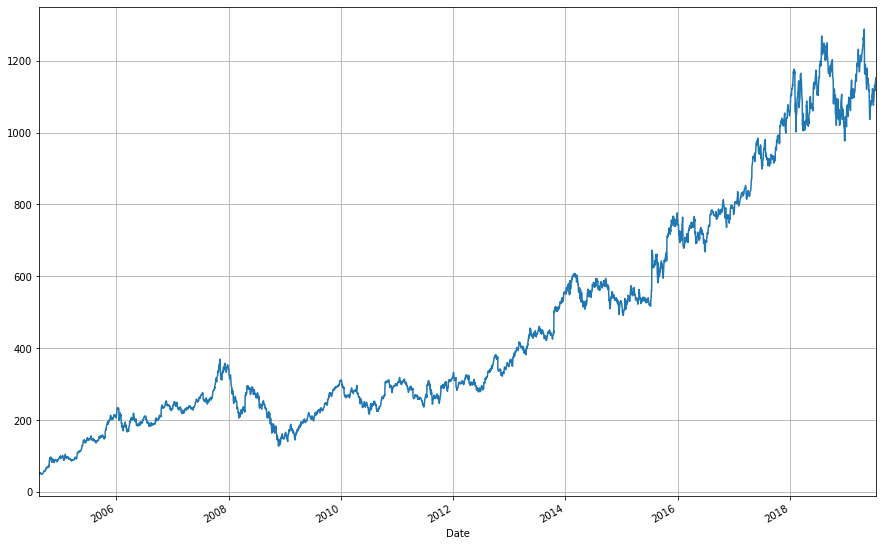

In [7]:
df['Close'].plot(grid = True, figsize = (15, 10))